In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [3]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [4]:
log_returns = np.log(1 + data.pct_change())

In [6]:
log_returns.tail()

,PG
Date,
2020-03-11,-0.077233
2020-03-12,-0.091428
2020-03-13,0.113409
2020-03-16,-0.050062
2020-03-17,0.085966


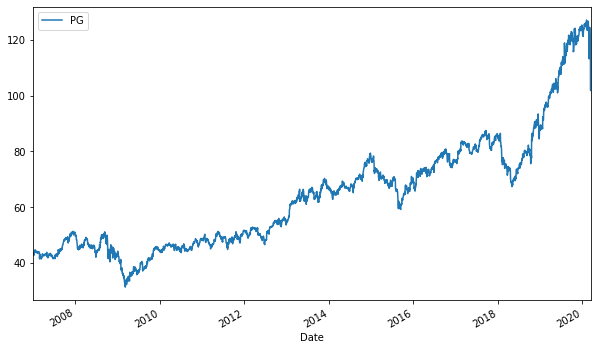

In [7]:
data.plot(figsize=(10,6))

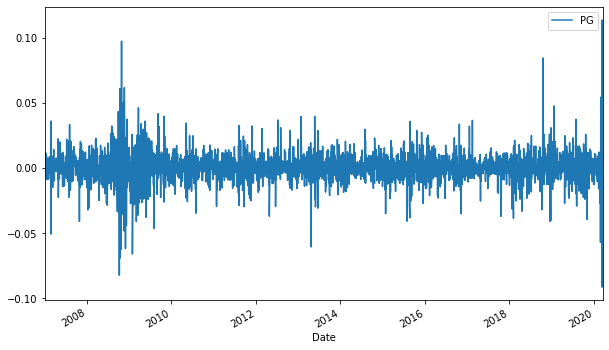

In [8]:
log_returns.plot(figsize=(10,6))

In [9]:
u = log_returns.mean()
u

PG    0.000301
dtype: float64

In [10]:
var = log_returns.var()
var

PG    0.000134
dtype: float64

In [11]:
drift = u - (0.5 * var)
drift

PG    0.000234
dtype: float64

In [12]:
stdev = log_returns.std()
stdev

PG    0.011582
dtype: float64

In [13]:
type(drift)

pandas.core.series.Series

In [14]:
np.array(drift)

array([0.0002343])

In [15]:
drift.values

array([0.0002343])

In [17]:
# how many std from mean (Z)
norm.ppf(0.95)

1.6448536269514722

In [18]:
x = np.random.rand(10,2)
x

array([[0.04698355, 0.38107102],
       [0.41014906, 0.53087267],
       [0.71252462, 0.05493791],
       [0.29595905, 0.08966006],
       [0.68655363, 0.28245091],
       [0.6405135 , 0.92123766],
       [0.33801341, 0.84558073],
       [0.34011877, 0.49028768],
       [0.23570498, 0.88511081],
       [0.96557028, 0.7865514 ]])

In [19]:
norm.ppf(x)

array([[-1.67483248, -0.3026691 ],
       [-0.22716156,  0.0774637 ],
       [ 0.56077526, -1.59875159],
       [-0.53605853, -1.34285135],
       [ 0.48610496, -0.57557598],
       [ 0.35983169,  1.41344584],
       [-0.417891  ,  1.01766217],
       [-0.412139  , -0.02434758],
       [-0.72018684,  1.20092995],
       [ 1.81934083,  0.79451238]])

In [20]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 0.47262187, -0.71366648],
       [ 2.43855271, -0.86928774],
       [ 0.17672027,  0.59521316],
       [-0.44546045,  1.08625906],
       [-0.41205567, -0.20414848],
       [-0.90951425, -0.46120046],
       [-1.59991775,  0.58921291],
       [ 0.19215611, -0.4225299 ],
       [ 0.54806865, -0.65451359],
       [-0.74015004, -0.70897395]])

In [21]:
t_intervals = 1000
iterations = 10

In [22]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[1.02114396, 0.98644093, 0.99525161, ..., 0.99738619, 1.00083648,
        0.99830737],
       [1.00991583, 0.9828346 , 1.0192346 , ..., 0.98727885, 0.99881177,
        0.99703484],
       [1.0149001 , 1.00650419, 1.0186532 , ..., 0.98296249, 1.01984031,
        1.00227048],
       ...,
       [0.98348912, 1.01935579, 1.02049245, ..., 1.01060886, 0.99711568,
        1.00174432],
       [0.98778308, 1.00248937, 1.00042965, ..., 1.01527734, 1.0061796 ,
        0.99887338],
       [0.99505499, 1.00913357, 1.01103002, ..., 1.00942836, 0.99639247,
        0.97953284]])

In [23]:
S0 = data.iloc[-1]
S0

PG    118.239998
Name: 2020-03-17 00:00:00, dtype: float64

In [24]:
price_list = np.zeros_like(daily_returns)

In [25]:
price_list[0] = S0

In [26]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]
price_list

array([[118.23999786, 118.23999786, 118.23999786, ..., 118.23999786,
        118.23999786, 118.23999786],
       [119.41244504, 116.21036145, 120.51429742, ..., 116.73584919,
        118.09950137, 117.88939698],
       [121.1917022 , 116.96621623, 122.76227421, ..., 114.74696079,
        120.44263198, 118.15706217],
       ...,
       [120.93966094, 136.8039031 , 158.49225935, ..., 172.89676218,
        222.69595772, 101.14806331],
       [119.46215081, 137.1444584 , 158.56035491, ..., 175.53816535,
        224.07213049, 101.03410748],
       [118.87140931, 138.39707639, 160.30927949, ..., 177.19320231,
        223.26378305,  98.9662267 ]])

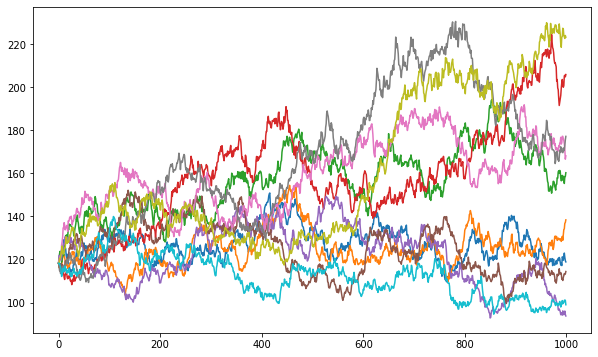

In [27]:
plt.figure(figsize=(10,6))
plt.plot(price_list)